In [1]:
%env CUDA_VISIBLE_DEVICES=1


env: CUDA_VISIBLE_DEVICES=1


In [2]:
# from densenet.densenet_lib import Densenet_keras
import os 
import sys
sys.path.insert(0, os.getcwd())
import tensorflow as tf
import keras.backend as K
# import keys_union
from glob import glob
from PIL import Image
import time
import matplotlib.pyplot as plt
import difflib
import re
import random
import cv2
from densenet.keys import alphabet_union
import densenet.densenet_lib as densenet_lib

Using TensorFlow backend.


In [3]:
import imp
imp.reload(densenet_lib)

<module 'densenet.densenet_lib' from '/mnt/wuwenhui/git_ocr_project/chinese_ocr_densenet/densenet/densenet_lib.py'>

In [6]:
model_path = './models/weights_densenet_union_with_num-27-0.84.h5'
characters = alphabet_union[:]
characters = characters[1:]+u'卍'
densenet_keras = densenet_lib.Densenet_keras(model_path=model_path,characters=characters)

In [489]:
# %time densenet_keras.load_weights('./train/models/')


(1, 32, 488, 1)
CPU times: user 19 ms, sys: 918 µs, total: 19.9 ms
Wall time: 38.4 ms


'血清总胆固醇测定※'

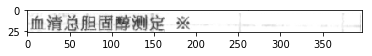

In [27]:
# densenet_keras.load_weights('./train/models/weights_densenet-41-0.67.h5')

imgs_path = glob('/mnt/wuwenhui/git_ocr_project/keras_crnn/train/data/manual_crop/zh/*.png')
img_path = random.choice(imgs_path)
# print(img_path)
# img = Image.open(img_path)
img = cv2.imread(img_path)
%time result = densenet_keras.recognize(img)
plt.imshow(img)
result

In [ ]:
char_set = open('./train/char_std_5990.txt', 'r', encoding='utf-8').readlines()
char_set = ''.join([ch.strip('\n') for ch in char_set][1:] + ['卍'])
nclass = len(char_set)

In [ ]:
char_set

In [ ]:
from densenet.keys import alphabet

In [ ]:
alphabet.find(' ')